In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 对网络 G 进行可视化
def plot_graph(G):
  fig, ax = plt.subplots(figsize = (12, 8))
  # plt.figure()
  pos = nx.spring_layout(G)
  edges = G.edges()
  # nx.draw_networkx(G, pos, edges = edges)
  nx.draw_networkx_nodes(G, pos, nodelist = G.nodes(), node_size = 300, node_color = 'r', alpha = 0.8)
  nx.draw_networkx_edges(G, pos, edgelist = edges, alpha = 0.4)
  nx.draw_networkx_labels(G, pos, font_size = 10, ax = ax)
  plt.show()

In [3]:
import os 
data_path = os.environ.get('DATA_PATH') + 'AI_Cheats/'

# 数据加载，构造图
G = nx.read_gml(data_path + 'LPA/football.gml')
print(G)
print(type(G))

Graph with 115 nodes and 613 edges
<class 'networkx.classes.graph.Graph'>


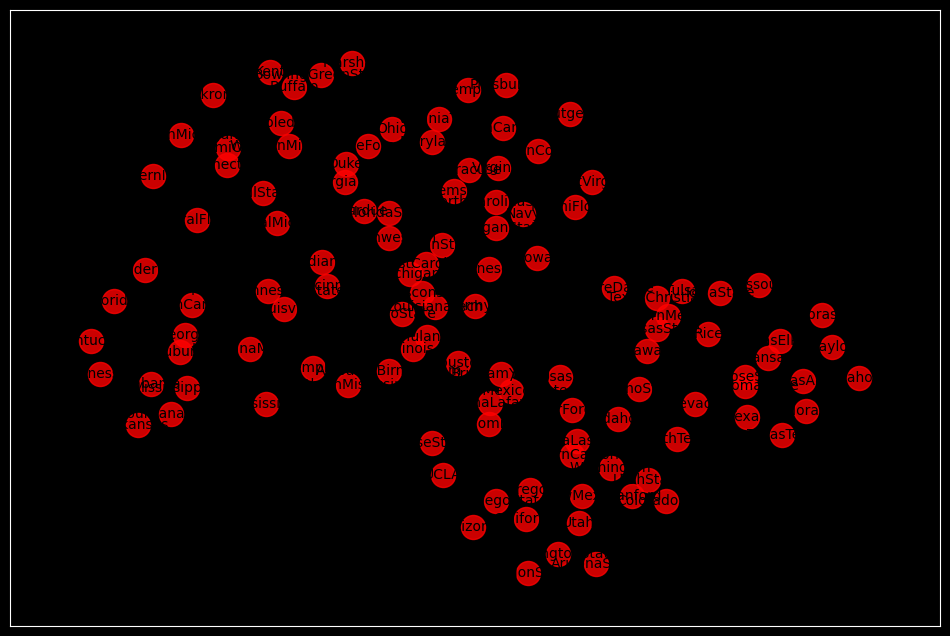

['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCarolina', 

In [4]:
# 可视化
plot_graph(G)
print(list(G.nodes()))
print(G.nodes['BrighamYoung']['value'])

In [5]:
# 构建 GCN，计算 A_hat 和 D_hat 矩阵
# 按照字母顺序排序
order = sorted(list(G.nodes()))
print(order)

# 邻接矩阵
A = nx.to_numpy_array(G, nodelist = order)
print(A)

['AirForce', 'Akron', 'Alabama', 'AlabamaBirmingham', 'Arizona', 'ArizonaState', 'Arkansas', 'ArkansasState', 'Army', 'Auburn', 'BallState', 'Baylor', 'BoiseState', 'BostonCollege', 'BowlingGreenState', 'BrighamYoung', 'Buffalo', 'California', 'CentralFlorida', 'CentralMichigan', 'Cincinnati', 'Clemson', 'Colorado', 'ColoradoState', 'Connecticut', 'Duke', 'EastCarolina', 'EasternMichigan', 'Florida', 'FloridaState', 'FresnoState', 'Georgia', 'GeorgiaTech', 'Hawaii', 'Houston', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'IowaState', 'Kansas', 'KansasState', 'Kent', 'Kentucky', 'LouisianaLafayette', 'LouisianaMonroe', 'LouisianaState', 'LouisianaTech', 'Louisville', 'Marshall', 'Maryland', 'Memphis', 'MiamiFlorida', 'MiamiOhio', 'Michigan', 'MichiganState', 'MiddleTennesseeState', 'Minnesota', 'Mississippi', 'MississippiState', 'Missouri', 'Navy', 'Nebraska', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'NewMexicoState', 'NorthCarolina', 'NorthCarolinaState', 'NorthTexas', 'NorthernIllinois', '

In [6]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
print(I)
A_hat = A + I
print(A_hat)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [7]:
# D_hat 为 A_hat 的度矩阵
D_hat = np.sum(A_hat, axis=0)
print('D_hat: \n', D_hat)

D_hat: 
 [11. 12. 12. 11. 12. 12. 11. 11. 12. 12. 11. 11. 10. 12. 12. 13. 12. 12.
  9. 12. 12. 11. 12. 11.  8. 12. 12. 12. 12. 13. 12. 11. 12. 12. 12. 10.
 12. 12. 13. 12. 11. 13. 11. 11.  9.  9. 11. 11. 11. 11. 12. 12. 11. 12.
 12. 12. 10. 12. 12. 12. 11. 12. 12. 13. 13. 12. 12. 12. 12. 11. 11. 12.
 12. 11. 12. 12. 11. 12. 11. 13. 12. 12. 12. 11. 12. 12. 12. 13. 13. 11.
 12. 12. 12. 12. 12. 12. 12. 12. 13. 10. 12. 13. 12. 12. 10. 12. 11. 12.
 11. 12. 12. 12. 11. 13. 12.]


In [8]:
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat: \n', D_hat)

D_hat: 
 [[11.  0.  0. ...  0.  0.  0.]
 [ 0. 12.  0. ...  0.  0.  0.]
 [ 0.  0. 12. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 11.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 12.]]


In [9]:
# 初始化权重，normal 正太分布 loc 均值，scale 标准差
# 第一层神经元， 4 个维度
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))

# 第二层神经元，4 => 2
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1: \n', W_1)
print('W_2: \n', W_2)

W_1: 
 [[-9.93075156e-01 -5.42792120e-01  3.76695862e-01  8.26213125e-02]
 [ 1.32046469e+00  1.43843442e-01 -7.53680551e-01  7.28795400e-01]
 [-9.28723449e-02 -4.20924630e-01 -1.94295376e-01  1.41994037e+00]
 [ 1.74580086e+00 -1.48343276e+00  2.87684722e-01 -3.85184618e-01]
 [ 8.23552866e-01  1.00166044e+00 -9.56814808e-02  6.21101097e-01]
 [ 9.88529138e-01 -1.44374271e+00  5.32701644e-01 -1.16686776e+00]
 [ 1.60338728e-02 -5.08428280e-01 -1.61994065e+00  1.07524559e+00]
 [-7.53372585e-01  2.19763322e-01  3.12070914e-01  1.09747386e-01]
 [-2.95032156e-01 -2.50474603e-01  1.28905918e+00  8.85858002e-01]
 [-1.11850335e+00 -3.13797226e-01 -9.50786954e-03  4.76862934e-03]
 [ 5.20802806e-01 -1.82525757e+00 -1.75956144e+00 -1.94203892e+00]
 [-9.15597637e-01  4.82001854e-01 -3.84711964e-02 -2.04922029e+00]
 [ 2.37466994e-01  6.90010696e-01 -9.69819608e-03 -1.37374497e+00]
 [-4.97625214e-01 -5.06288448e-01 -5.26242015e-01  4.54031250e-01]
 [-4.77705099e-01  5.93437468e-02 -5.73854772e-01  6.72

In [10]:
# 当 x<0 时，结果 = 0，x >= 0 时，结果 = x
def relu(x):
  return (abs(x)+x) / 2

In [11]:
# 叠加 GCN 层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一

def gcn_layer(A_hat, D_hat, X, W):
  return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output: \n', output)

output: 
 [[4.51197212e-01 3.44516111e-01]
 [1.22863115e-01 2.09689585e-01]
 [0.00000000e+00 0.00000000e+00]
 [3.80168697e-01 5.34993972e-01]
 [1.56347679e-01 4.46303325e-01]
 [3.03094271e-01 5.01203770e-01]
 [4.78189023e-02 5.14389054e-02]
 [0.00000000e+00 2.87542270e-02]
 [1.95397296e-01 1.83569271e-01]
 [1.21871115e-01 1.24211468e-01]
 [1.29969043e-01 2.43692225e-01]
 [9.76662109e-02 2.25074763e-01]
 [9.35995648e-02 1.50853371e-01]
 [2.54818111e-01 2.95348355e-01]
 [5.17254174e-02 9.52771056e-02]
 [3.86243376e-01 2.39367747e-01]
 [1.44749112e-01 2.32743255e-01]
 [1.34157553e-01 4.02108900e-01]
 [1.35782304e-01 2.12322727e-01]
 [6.34273133e-02 5.29975333e-02]
 [6.25502313e-02 1.56332215e-01]
 [4.30124552e-02 1.38496073e-02]
 [3.51681338e-01 5.86922004e-01]
 [3.84229729e-01 3.88552030e-01]
 [3.12597531e-01 5.13675759e-01]
 [0.00000000e+00 0.00000000e+00]
 [1.98554739e-01 1.92140504e-01]
 [9.52997172e-02 1.66509472e-01]
 [1.18201971e-01 1.48017242e-01]
 [2.30978156e-02 0.00000000e+00]


In [12]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
  feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations: \n', feature_representations)

feature_representations: 
 {'BrighamYoung': array([0.45119721, 0.34451611]), 'FloridaState': array([0.12286312, 0.20968959]), 'Iowa': array([0., 0.]), 'KansasState': array([0.3801687 , 0.53499397]), 'NewMexico': array([0.15634768, 0.44630332]), 'TexasTech': array([0.30309427, 0.50120377]), 'PennState': array([0.0478189 , 0.05143891]), 'SouthernCalifornia': array([0.        , 0.02875423]), 'ArizonaState': array([0.1953973 , 0.18356927]), 'SanDiegoState': array([0.12187111, 0.12421147]), 'Baylor': array([0.12996904, 0.24369222]), 'NorthTexas': array([0.09766621, 0.22507476]), 'NorthernIllinois': array([0.09359956, 0.15085337]), 'Northwestern': array([0.25481811, 0.29534836]), 'WesternMichigan': array([0.05172542, 0.09527711]), 'Wisconsin': array([0.38624338, 0.23936775]), 'Wyoming': array([0.14474911, 0.23274325]), 'Auburn': array([0.13415755, 0.4021089 ]), 'Akron': array([0.1357823 , 0.21232273]), 'VirginiaTech': array([0.06342731, 0.05299753]), 'Alabama': array([0.06255023, 0.15633222]

In [13]:
# 不同节点 value, 绘制不同的颜色
def getValue(value):
  colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
  return colorList[int(value)]

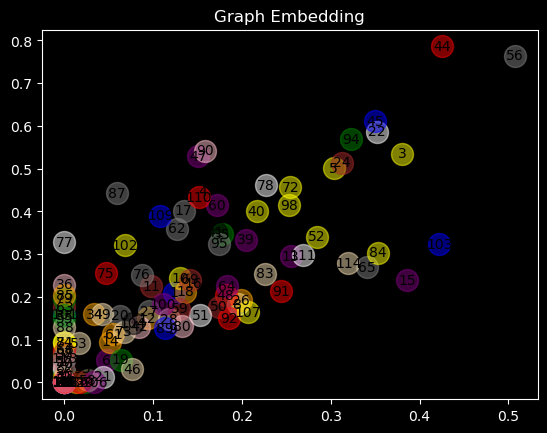

In [14]:
# 绘制 output，节点 GCN Embedding 可视化
def plot_node(output, title):
  for i in range(len(nodes)):
    node_name = nodes[i]
    value = G.nodes[node_name]['value']
    plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i), color=getValue(value), alpha=0.5, s=250)
    plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
  plt.title(title)
  plt.show()

plot_node(output, 'Graph Embedding')

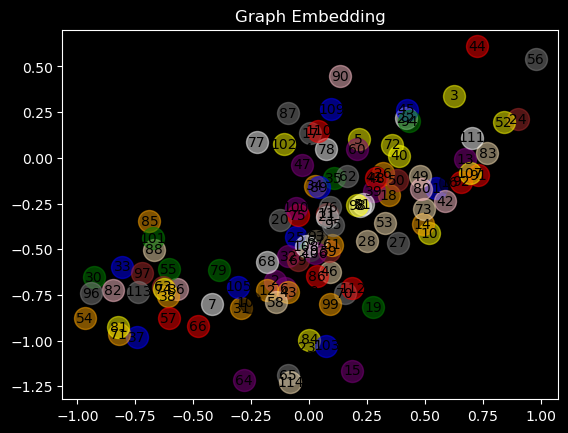

In [15]:
# 尝试去掉激活函数 relu, 重新运行一遍，效果可能会更好
def gcn_layer2(A_hat, D_hat, X, W):
  return D_hat**-1 * A_hat * X * W

H_3 = gcn_layer2(A_hat, D_hat, I, W_1)
H_4 = gcn_layer2(A_hat, D_hat, H_3, W_2)
output2 = H_4
plot_node(output2, 'Graph Embedding')